In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer
%matplotlib inline

In [2]:
boston = load_boston()

In [3]:
boston
#dataset is too massy

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
#lets clean up dataset to understand
#Transform the data set into a data frame
#feature_names = the columns names of the data
#target = the target variable or the price of the house  

X= pd.DataFrame(boston.data, columns= boston.feature_names)
Y= pd.DataFrame(boston.target)

In [6]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
#data spilt
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
X_train.shape, y_train.shape

((404, 13), (404, 1))

In [8]:
#with the following function we can select higly correlated feature
def correlation(dataset, threshold):
    col_corr = set() #set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])> threshold: #we are interested in absolute coeff value
                colname = corr_matrix.columns[i] #getting the name of column
                col_corr.add(colname)
    return col_corr

In [9]:
corr_features=correlation(X_train,0.7)
len(set(corr_features))

4

In [10]:
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

In [11]:
X_train = X_train.drop(corr_features, axis=1)
X_test = X_test.drop(corr_features,axis=1)

In [12]:
X_train

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
220,0.35809,0.0,6.20,1.0,6.951,8.0,17.4,391.70,9.71
71,0.15876,0.0,10.81,0.0,5.961,4.0,19.2,376.94,9.88
240,0.11329,30.0,4.93,0.0,6.897,6.0,16.6,391.25,11.38
6,0.08829,12.5,7.87,0.0,6.012,5.0,15.2,395.60,12.43
417,25.94060,0.0,18.10,0.0,5.304,24.0,20.2,127.36,26.64
...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0.0,5.708,5.0,19.6,391.13,11.74
192,0.08664,45.0,3.44,0.0,7.178,5.0,15.2,390.49,2.87
117,0.15098,0.0,10.01,0.0,6.021,6.0,17.8,394.51,10.30
47,0.22927,0.0,6.91,0.0,6.030,3.0,17.9,392.74,18.80


In [13]:
#change data in numpy array
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [14]:
#shuffle it
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train)
X_test,y_test = shuffle(X_test,y_test)

In [15]:
#preprocessing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [65]:
#model
model= keras.models.Sequential([
    keras.layers.Dense(74,kernel_initializer = 'lecun_uniform',activation="selu",input_dim = 9),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(42,activation="selu",kernel_initializer = 'lecun_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(42,activation="selu",kernel_initializer = 'lecun_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10,activation="selu",kernel_initializer = 'lecun_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1,activation="relu")
    
])

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 74)                740       
_________________________________________________________________
batch_normalization (BatchNo (None, 74)                296       
_________________________________________________________________
dense_4 (Dense)              (None, 42)                3150      
_________________________________________________________________
batch_normalization_1 (Batch (None, 42)                168       
_________________________________________________________________
dense_5 (Dense)              (None, 42)                1806      
_________________________________________________________________
batch_normalization_2 (Batch (None, 42)                168       
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [67]:
loss=tf.keras.losses.Huber(delta=1.0, reduction="auto", name="huber_loss")
optimizer = keras.optimizers.Adam(learning_rate=0.01,decay=1e-4)

In [68]:
#compile
model.compile(optimizer=optimizer,loss=loss,metrics=["mae"])

In [69]:
history = model.fit(X_train, y_train, validation_split =0.1, batch_size = 10, epochs = 50, shuffle = True, verbose =2)

Train on 363 samples, validate on 41 samples
Epoch 1/50
363/363 - 1s - loss: 19.2544 - mae: 19.7515 - val_loss: 14.6038 - val_mae: 15.0809
Epoch 2/50
363/363 - 0s - loss: 13.6028 - mae: 14.0906 - val_loss: 6.4748 - val_mae: 6.9649
Epoch 3/50
363/363 - 0s - loss: 7.3313 - mae: 7.8164 - val_loss: 13.2320 - val_mae: 13.7320
Epoch 4/50
363/363 - 0s - loss: 5.3761 - mae: 5.8548 - val_loss: 8.0411 - val_mae: 8.5410
Epoch 5/50
363/363 - 0s - loss: 4.9880 - mae: 5.4653 - val_loss: 4.4368 - val_mae: 4.9000
Epoch 6/50
363/363 - 0s - loss: 4.9849 - mae: 5.4628 - val_loss: 11.6610 - val_mae: 12.1525
Epoch 7/50
363/363 - 0s - loss: 3.3847 - mae: 3.8455 - val_loss: 7.3588 - val_mae: 7.8557
Epoch 8/50
363/363 - 0s - loss: 3.2027 - mae: 3.6672 - val_loss: 6.4134 - val_mae: 6.9026
Epoch 9/50
363/363 - 0s - loss: 3.3923 - mae: 3.8526 - val_loss: 5.0592 - val_mae: 5.5529
Epoch 10/50
363/363 - 0s - loss: 3.5192 - mae: 3.9956 - val_loss: 4.0305 - val_mae: 4.5305
Epoch 11/50
363/363 - 0s - loss: 3.5277 - ma

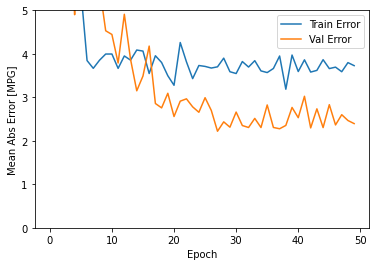

In [70]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'],hist['mae'],
            label='Train Error')
    plt.plot(hist['epoch'],hist['val_mae'],
            label='Val Error')
    
    plt.legend()
    plt.ylim([0,5])
plot_history(history)   

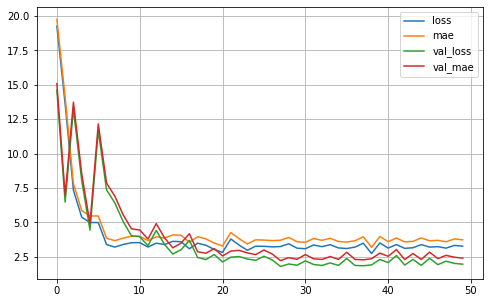

In [71]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [60]:
#tuning
from kerastuner.tuners import RandomSearch
import kerastuner

def build_model(hp):
    model=keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model.add(keras.layers.Dense(units=hp.Int('units_'+str(i),
                                                 min_value=10,
                                                 max_value=100,
                                                 step=32),
                                    activation="relu",kernel_initializer='he_uniform'))
    model.add(keras.layers.Dense(1,activation='linear'))
    model.compile(
                optimizer=keras.optimizers.Adam(
                    hp.Choice('learning_rate',[1e-2,1e-3,1e-4])),
                loss=loss,
                metrics=['mae'])
    return model

In [61]:
tuner= RandomSearch(
        build_model,
        objective=kerastuner.Objective("val_mae", direction="min"),
        max_trials=5,
        executions_per_trial=3,
        directory='project1',
        project_name='Boston Index')

INFO:tensorflow:Reloading Oracle from existing project project1\Boston Index\oracle.json
INFO:tensorflow:Reloading Tuner from project1\Boston Index\tuner0.json


In [62]:
tuner.search_space_summary()

In [63]:
tuner.search(X_train, y_train,epochs=10, validation_split=0.1)

INFO:tensorflow:Oracle triggered exit


In [64]:
tuner.results_summary()